In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import C4XGate
from numpy import pi

In [2]:
list_number = [1, -1, 1, 0]

In [3]:
def prepare_circuit(list_number):
    work_qbits_num = len(list_number)
    ancilla_qbits_num = 1
    all_qbits_num = work_qbits_num + ancilla_qbits_num 
    classical_bits_num = all_qbits_num
    
    qr = QuantumRegister(work_qbits_num, 'q')
    anc = QuantumRegister(ancilla_qbits_num, 'ancilla')
    cr = ClassicalRegister(classical_bits_num, 'c')
    circuit = QuantumCircuit(anc, qr, cr)
    
    # circuit = QuantumCircuit(qr, cr)
    
    for i, _ in enumerate(list_number):
        if list_number[i] == -1:
            circuit.x(i)

    circuit.barrier()
    
    circuit.h(i for i in range(all_qbits_num))
    
    circuit.barrier()
    
#     quantum_registers_list = [qr[i] for i in range(work_qbits_num)] 
#     # print([qr[i] for i in range(len(list_number))], cr[0])
#     # TODO: how do you 
    # circuit.append(C4XGate(), [qr[3], qr[2], qr[1], qr[0], anc[0]])
    
    for i in range(work_qbits_num):  
        circuit.cx(qr[i], anc[0])
    
    circuit.barrier()
    
    circuit.h(i for i in range(all_qbits_num))
    
    circuit.measure(anc[0], cr[0])
    for i in range(work_qbits_num):
        circuit.measure(qr[i], cr[i+1])
    return circuit

In [4]:
# def is_constant(list_number):
# Prepare the circuit -1 ->, 0,1 -> 1

# Create a circuit
# print(qbits_num)
# circuit = QuantumCircuit(qbits_num, 1)

circuit = prepare_circuit(list_number)
circuit.draw()


# print(measure)


# circuit.measure(qreg_q[0], creg_c[0])


    # return True

#     list = prepare_circuit(list)
#     circuit.x(qreg_q[1])
#     circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
#     circuit.h(qreg_q[1])
#     circuit.h(qreg_q[2])
#     circuit.h(qreg_q[0])
#     circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
#     circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
#     circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
#     circuit.h(qreg_q[0])
#     circuit.h(qreg_q[1])
#     circuit.h(qreg_q[2])
#     circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
#     circuit.measure(qreg_q[0], creg_c[0])

░ ┌───┐ ░ ┌───┐┌───┐┌───┐┌───┐ ░ ┌───┐┌─┐            
ancilla: ──────░─┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├─░─┤ H ├┤M├────────────
         ┌───┐ ░ ├───┤ ░ └─┬─┘└─┬─┘└─┬─┘└─┬─┘ ░ ├───┤└╥┘┌─┐         
    q_0: ┤ X ├─░─┤ H ├─░───■────┼────┼────┼───░─┤ H ├─╫─┤M├─────────
         └───┘ ░ ├───┤ ░        │    │    │   ░ ├───┤ ║ └╥┘┌─┐      
    q_1: ──────░─┤ H ├─░────────■────┼────┼───░─┤ H ├─╫──╫─┤M├──────
               ░ ├───┤ ░             │    │   ░ ├───┤ ║  ║ └╥┘┌─┐   
    q_2: ──────░─┤ H ├─░─────────────■────┼───░─┤ H ├─╫──╫──╫─┤M├───
               ░ ├───┤ ░                  │   ░ ├───┤ ║  ║  ║ └╥┘┌─┐
    q_3: ──────░─┤ H ├─░──────────────────■───░─┤ H ├─╫──╫──╫──╫─┤M├
               ░ └───┘ ░                      ░ └───┘ ║  ║  ║  ║ └╥┘
    c: 5/═════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                      0  1  2  3  4

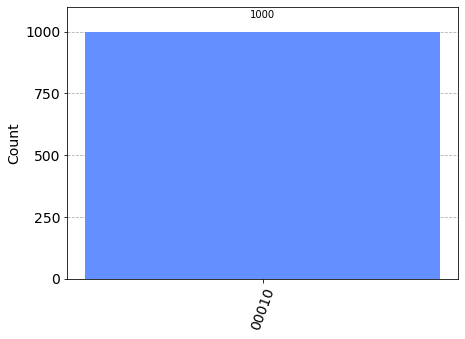

In [5]:
from qiskit import IBMQ, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.basicaer import BasicAer

# provider = IBMQ.load_account()
backend = BasicAer.get_backend("qasm_simulator")
shots = 1000
results = execute(circuit, backend=backend, shots=shots).result()
probabilities = results.get_counts()

plot_histogram(probabilities)

In [6]:
# We use the QASM simulator => only one answer should be provided by 
# the circuit with probability 1. In other cases we would use the answer
# with maximum probablity.
max_probability = list(probabilities.keys())[0]

# Our answer is hidden in the ancilla qubit. If it is 0 that would mean that 
# the list is constant. Otherwise, it is balanced. 
answer = max_probability[0]

print(answer)
print(answer == '0')

0
True


In [7]:
list_number = [1, 1, -1, 0]
print(is_constant(list_number))

NameError: name 'is_constant' is not defined